##Code to generate and save Gaussian test data for PULearning validation

In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
# define constants

num_positive = 1000 #positive data
num_negative = 1000 # negative data
fractionOfPositives_labeled = 1.0 
fractionOfNegatives_labeled = 1.0 

#define Gaussians mean and covariance matrices

Gaussian1_mean = [0,0]
Gaussian2_mean = [5,5]

Gaussian1_cov = [[1, 0.5], [0.5, 1]]
Gaussian2_cov = [[1, -0.5], [-0.5, 1]]

#random generated data

positive_data = np.random.multivariate_normal(Gaussian1_mean,Gaussian1_cov,num_positive)
negative_data = np.random.multivariate_normal(Gaussian2_mean,Gaussian2_cov,num_negative)

positive_data_quadraticTerms = np.square(positive_data)
negative_data_quadraticTerms = np.square(negative_data)

positiveData_features = np.column_stack((positive_data, positive_data_quadraticTerms))
negativeData_features = np.column_stack((negative_data, negative_data_quadraticTerms))

In [16]:
features = np.vstack((positiveData_features,negativeData_features))
num_positive_labels = math.trunc(num_positive*fractionOfPositives_labeled)
num_negative_labels = math.trunc(num_negative*fractionOfNegatives_labeled)
label = [1]*num_positive_labels + [0]*(num_positive-num_positive_labels)+ [0]*(num_negative-num_negative_labels) + [0]*num_negative_labels

In [17]:
data = np.column_stack((label, features))
np.random.shuffle(data)

In [18]:
df = pd.DataFrame(data, columns=['label','x','y', 'x**2', 'y**2'])

In [19]:
df.head(10)

,label,x,y,x**2,y**2
0,0,4.174490,5.649982,17.426368,31.922296
1,0,4.500773,4.165256,20.256955,17.349356
2,0,4.492791,4.021679,20.185168,16.173904
3,0,5.061559,5.155314,25.619375,26.577267
4,0,5.437658,5.017281,29.568125,25.173106
5,0,5.470247,4.946794,29.923603,24.470771
6,0,3.981282,5.062547,15.850605,25.629382
7,1,-1.680475,-2.665057,2.823996,7.102529
8,1,0.465427,-0.279112,0.216623,0.077904
9,1,0.433054,-0.934869,0.187536,0.873981


In [20]:
df.to_csv("../data/test2_Gaussians_formatted.csv")

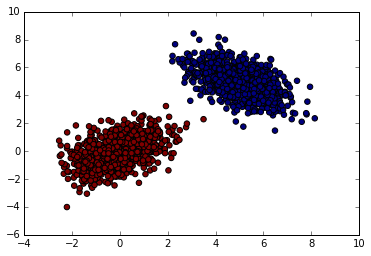

In [21]:
plt.figure()
plt.scatter(features[:, 0], features[:, 1], s=30, c=label)
plt.show()